# HW 6

1. Translating Sentences:
10 pts
Write a function that translates sentences. The function takes two arguements, the sentence to be translated and tthe targeted language and returns the translated sentence.

In [13]:
# Your code here:

from googletrans import Translator
translator = Translator()
translated_to_spanish = translator.translate("Make a career of humanity. Commit yourself to the noble struggle for equal rights. You will make a better person of yourself, a greater nation of your country, and a finer world to live in.", dest = "es")
print("Translated to Spanish: ", translated_to_spanish.text)

translated_to_spanish:  Hacer una carrera de la humanidad.Comprométate con la noble lucha por la igualdad de derechos.Harás una mejor persona de ti mismo, una nación más grande de tu país y un mundo más fino para vivir.


Take the following sentence and translate it from English to Spanish.
"Make a career of humanity. Commit yourself to the noble struggle for equal rights. You will make a better person of yourself, a greater nation of your country, and a finer world to live in."

2. Now translate it from Spanish to Chinese
2.5pts

In [22]:
#Your code here:
translated_to_chinese = translator.translate("Hacer una carrera de la humanidad.Comprométate con la noble lucha por la igualdad de derechos.Harás una mejor persona de ti mismo, una nación más grande de tu país y un mundo más fino para vivir", dest="zh-CN")
print("Translated to Chinese: ", translated_to_chinese.text)

Translated to Chinese:  使人类职业生涯以平等的权利来促进自己。


3. Now translate it from Chinese back to English.
2.5pts

In [24]:
#Your code here:
translated_to_english = translator.translate(" 使人类职业生涯以平等的权利来促进自己。", dest="en")
print("Translated to English: ", translated_to_english.text)

Translated to English:  Make human career promoting themselves with equal rights.


4. Now do the same thing with ChatGPT.

2.5pts
Eng to Sp: Sp to Chinese: Chinese to Eng:



In [20]:
#ChatGPT response

from googletrans import Translator

# Initialize the translator
translator = Translator()

# Original English text
text_eng = "Make a career of humanity. Commit yourself to the noble struggle for equal rights. You will make a better person of yourself, a greater nation of your country, and a finer world to live in."

# Step 1: Translate from English to Spanish
translated_to_spanish = translator.translate(text_eng, dest="es")
print("Translated to Spanish:", translated_to_spanish.text)

# Step 2: Translate from Spanish to Chinese (Simplified)
translated_to_chinese = translator.translate(translated_to_spanish.text, dest="zh-CN")
print("Translated to Chinese (Simplified):", translated_to_chinese.text)

# Step 3: Translate from Chinese (Simplified) back to English
translated_back_to_english = translator.translate(translated_to_chinese.text, dest="en")
print("Translated back to English:", translated_back_to_english.text)


Translated to Spanish: Hacer una carrera de la humanidad.Comprométate con la noble lucha por la igualdad de derechos.Harás una mejor persona de ti mismo, una nación más grande de tu país y un mundo más fino para vivir.
Translated to Chinese (Simplified): 通过为平等权利而努力的人类职业。
Translated back to English: Human occupations that work hard for equal rights.


5. Describe the difference in quality and features of output:
2.5pts

Your answer here:


 ## 7.  The Trump Card
Here is a link to a speech made by former President Trump on January 6: https://www.npr.org/2021/02/10/966396848/read-trumps-jan-6-speech-a-key-part-of-impeachment-trial. Not all of the text is his speech. Some of the text is the analysis. Please extract Donald Trump's speech only, remove stopwords and perform a word frequency distribution and visualize it.
20pts

In [7]:
#Your code here:
import requests
from bs4 import BeautifulSoup
 
base_url = "https://www.npr.org/2021/02/10/966396848/read-trumps-jan-6-speech-a-key-part-of-impeachment-trial"
r = requests.get(base_url)
soup = BeautifulSoup(r.text)
paragraphs = soup.find_all('p')

# I copied the first statement of the speech and the last statements to note the beginning and end.
start_marker = "Well, thank you very much."
end_marker = "Thank you all for being here. This is incredible. Thank you very much. Thank you."

# If the paragraph is after the starting speech, it will be captured. This will continue until the code gets to the last statement (the end marker) 
capturing = False
speech_text = []

for p in paragraphs:
    text = p.get_text().strip()
    
    # Check if the current paragraph is the start of the speech
    if start_marker in text:
        capturing = True
    
    # If we are capturing, add the paragraph to the speech_text list
    if capturing:
        speech_text.append(text)
    
    # Stop capturing when the end of the speech is found
    if end_marker in text:
        break

# Combine the speech text into one large string (otherwise it will come out as a list)
speech_text = ' '.join(speech_text)

# Printing the full extracted speech
print(speech_text)

# I saved the speech tot a file to make things easier
with open('trump_jan6_speech.txt', 'w') as f:
    f.write(speech_text)


Well, thank you very much. This is incredible. Media will not show the magnitude of this crowd. Even I, when I turned on today, I looked, and I saw thousands of people here. But you don't see hundreds of thousands of people behind you because they don't want to show that. We have hundreds of thousands of people here and I just want them to be recognized by the fake news media. Turn your cameras please and show what's really happening out here because these people are not going to take it any longer. They're not going to take it any longer. Go ahead. Turn your cameras, please. Would you show? They came from all over the world, actually, but they came from all over our country. I just really want to see what they do. I just want to see how they covered. I've never seen anything like it. But it would be really great if we could be covered fairly by the media. The media is the biggest problem we have as far as I'm concerned, single biggest problem. The fake news and the Big tech. Big tech 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jaa262\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


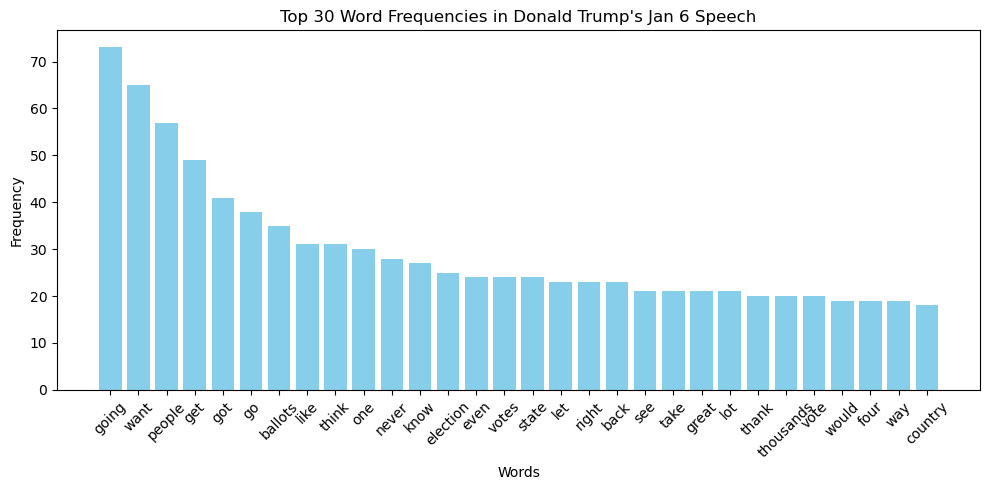

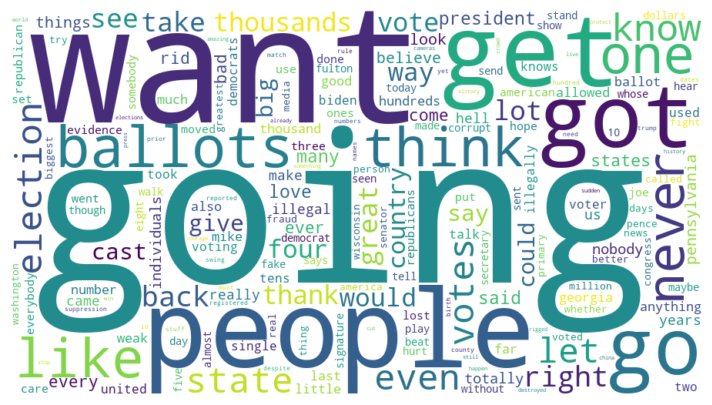

In [18]:
#Removing stopwords and perform a word frequency distribution and visualize it

import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download stopwords from nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
words = speech_text.lower().split()  # Convert to lowercase and split by spaces (basic tokenization)

filtered_words = []
for word in words:
    if word.isalnum() and word not in stop_words:
        filtered_words.append(word)

word_freq = Counter(filtered_words)

# Step 3: Visualize Top Words Using a Bar Chart
top_words = dict(word_freq.most_common(30))  # Top 10 most frequent words

plt.figure(figsize=(10, 5))
plt.bar(top_words.keys(), top_words.values(), color='skyblue')
plt.title("Top 30 Word Frequencies in Donald Trump's Jan 6 Speech")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Visualizing with Word Cloud
wordcloud = WordCloud(width=900, height=500, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

8. Here is a link to a github repo that contains Donald Trump's speeches: https://github.com/ryanmcdermott/trump-speeches/blob/master/speeches.txt
   
What are the 10 most common things Donald Trump "loves?"
10pts

In [26]:
#Your code and answer here:
#Webscarppping the entire speech using the raw GitHub URL (base_url = "https://raw.githubusercontent.com/ryanmcdermott/trump-speeches/master/speeches.txt")

import requests
from bs4 import BeautifulSoup
 
base_url = base_url = "https://raw.githubusercontent.com/ryanmcdermott/trump-speeches/master/speeches.txt"

r = requests.get(base_url)
soup = BeautifulSoup(r.text)
paragraphs = soup.find_all('p')

for p in paragraphs:
    print(p.get_text())

# I copied the first statement of the speech and the last statements to note the beginning and end.
start_sentence = "﻿SPEECH 1"
end_sentence = "We Are Going To Make America Great Again For Everyone – Greater Than Ever Before. Thank you."

# If the paragraph is after the starting speech, it will be captured. This will continue until the code gets to the last statement (the end marker) 
capturing = False
speech_text1 = []

for p in paragraphs:
    text1 = p.get_text().strip()
    
    # Check if the current paragraph is the start of the speech
    if start_sentence in text1:
        capturing = True
    
    # If we are capturing, add the paragraph to the speech_text list
    if capturing:
        speech_sentence.append(text)
    
    # Stop capturing when the end of the speech is found
    if end_sentence in text1:
        break

# Combine the speech text into one large string (otherwise it will come out as a list)
speech_text1 = ' '.join(speech_text1)

# Printing the full extracted speech
print(speech_text1)

# I saved the speech tot a file to make things easier
with open('trump_overall_speech.txt', 'w') as f:
    f.write(speech_text1)

SPEECH 1


...Thank you so much.  That's so nice.  Isn't he a great guy.  He doesn't get a fair press; he doesn't get it.  It's just not fair.  And I have to tell you I'm here, and very strongly here, because I have great respect for Steve King and have great respect likewise for Citizens United, David and everybody, and tremendous resect for the Tea Party.  Also, also the people of Iowa.  They have something in common.  Hard-working people.  They want to work, they want to make the country great.  I love the people of Iowa.  So that's the way it is.  Very simple.
With that said, our country is really headed in the wrong direction with a president who is doing an absolutely terrible job.  The world is collapsing around us, and many of the problems we've caused.  Our president is either grossly incompetent, a word that more and more people are using, and I think I was the first to use it, or he has a completely different agenda than you want to know about, which could be possible.  In a

In [52]:
#removing stopwords
# Correct URL to get the raw content from GitHub
base_url = "https://raw.githubusercontent.com/ryanmcdermott/trump-speeches/master/speeches.txt"
r = requests.get(base_url)

# Check if the request was successful
if r.status_code == 200:
    # Fetch the raw text
    text = r.text
    
    # Normalize text to lowercase
    text = text.lower()

    # Set the pattern to find "love" or "loves" followed by something
    # This pattern will capture the word(s) following "love" or "loves"
    pattern = r'\b(?:love|loves)\s+(\w+)'  # One word following "love" or "loves"

    # Find all matches of "love" or "loves" followed by a word
    matches = re.findall(pattern, text)

    # Step 8: Filter stopwords from the matches (without list comprehension)
    filtered_matches = []
    for word in matches:
        if word not in stop_words:  # Remove stopwords
            filtered_matches.append(word)
            
    # Count the frequency of the filtered matches
    love_counts = Counter(filtered_matches)

    # Get the 10 most common things Trump says he loves
    most_common_loves = love_counts.most_common(10)

    # Print the results
    print("10 Most Common Things Donald Trump 'Loves':")
    for thing, count in most_common_loves:
        print(f"{thing}: {count}")

else:
    print(f"Failed to retrieve the file. Status code: {r.status_code}")


10 Most Common Things Donald Trump 'Loves':
china: 5
florida: 4
mexico: 4
israel: 4
everybody: 3
trump: 3
bobby: 3
nevada: 2
john: 2
polls: 2


9. Which are the top 5 countries Trump mentions in his speeches, besides America or the United States of America?
10pts

Top 5 Countries Trump Mentions (besides America or the United States):
China: 86
Mexico: 71
Iran: 66
Israel: 42
Japan: 27


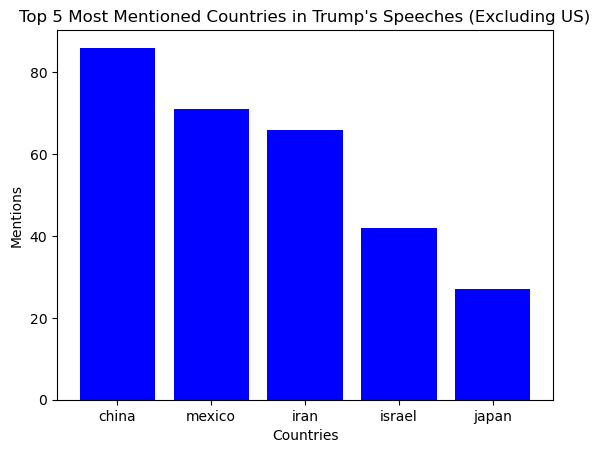

In [75]:
#Your code and answer here:
#using the already created speech-text1 above

# Predefined list of countries (excluding "America" and "United States")
countries = [
    # List of all countries by continent/region
    
    # Africa
    "algeria", "angola", "benin", "botswana", "burkina faso", "burundi", "cape verde", "cameroon", 
    "central african republic", "chad", "comoros", "congo", "democratic republic of the congo", 
    "djibouti", "egypt", "equatorial guinea", "eritrea", "eswatini", "ethiopia", "gabon", "gambia", 
    "ghana", "guinea", "guinea-bissau", "ivory coast", "kenya", "lesotho", "liberia", "libya", 
    "madagascar", "malawi", "mali", "mauritania", "mauritius", "morocco", "mozambique", "namibia", 
    "niger", "nigeria", "rwanda", "sao tome and principe", "senegal", "seychelles", "sierra leone", 
    "somalia", "south africa", "south sudan", "sudan", "tanzania", "togo", "tunisia", "uganda", 
    "zambia", "zimbabwe",
    
    # Asia
    "afghanistan", "armenia", "azerbaijan", "bahrain", "bangladesh", "bhutan", "brunei", "cambodia", 
    "china", "cyprus", "georgia", "india", "indonesia", "iran", "iraq", "israel", "japan", "jordan", 
    "kazakhstan", "north korea", "south korea", "kuwait", "kyrgyzstan", "laos", "lebanon", "malaysia", 
    "maldives", "mongolia", "myanmar", "nepal", "oman", "pakistan", "palestine", "philippines", 
    "qatar", "russia", "saudi arabia", "singapore", "sri lanka", "syria", "taiwan", "tajikistan", 
    "thailand", "timor-leste", "turkey", "turkmenistan", "united arab emirates", "uzbekistan", 
    "vietnam", "yemen",

    # Europe
    "albania", "andorra", "armenia", "austria", "azerbaijan", "belarus", "belgium", "bosnia and herzegovina", 
    "bulgaria", "croatia", "cyprus", "czech republic", "denmark", "estonia", "finland", "france", 
    "georgia", "germany", "greece", "hungary", "iceland", "ireland", "italy", "kazakhstan", "kosovo", 
    "latvia", "liechtenstein", "lithuania", "luxembourg", "malta", "moldova", "monaco", "montenegro", 
    "netherlands", "north macedonia", "norway", "poland", "portugal", "romania", "russia", "san marino", 
    "serbia", "slovakia", "slovenia", "spain", "sweden", "switzerland", "turkey", "ukraine", "united kingdom", 
    "vatican city",

    # Americas
    "argentina", "bahamas", "barbados", "belize", "bolivia", "brazil", "canada", "chile", "colombia", 
    "costa rica", "cuba", "dominica", "dominican republic", "ecuador", "el salvador", "grenada", 
    "guatemala", "guyana", "haiti", "honduras", "jamaica", "mexico", "nicaragua", "panama", "paraguay", 
    "peru", "saint kitts and nevis", "saint lucia", "saint vincent and the grenadines", "suriname", 
    "trinidad and tobago", "uruguay", "venezuela",

    # Oceania
    "australia", "fiji", "kiribati", "marshall islands", "micronesia", "nauru", "new zealand", 
    "palau", "papua new guinea", "samoa", "solomon islands", "tonga", "tuvalu", "vanuatu"
]

# Step 1: Fetch the raw speech text from the GitHub repository
base_url = "https://raw.githubusercontent.com/ryanmcdermott/trump-speeches/master/speeches.txt"
r = requests.get(base_url)

if r.status_code == 200:
    # Fetch the raw text (plain text, not HTML)
    speech_text = r.text
    
    # Step 2: Convert the speech text to lowercase and split it into words
    speech_text = speech_text.lower()
    speech_words = speech_text.split()

    # Step 3: Filter out stopwords and punctuation
    filtered_words = []
    for word in speech_words:
        if word.isalnum() and word not in stop_words:
            filtered_words.append(word)
    
    # Step 4: Find mentions of countries (other than "america" or "united states")
    country_mentions = []
    for word in filtered_words:
        if word in countries:
            country_mentions.append(word)
    
    # Step 5: Count the frequency of country mentions
    country_counts = Counter(country_mentions)

    # Step 6: Get the top 5 most common countries
    top_5_countries = country_counts.most_common(5)

    # Step 7: Print the top 5 most common countries
    print("Top 5 Countries Trump Mentions (besides America or the United States):")
    for country, count in top_5_countries:
        print(f"{country.capitalize()}: {count}")

      # Step 9: Visualization of the top 5 countries mentioned
    countries, counts = zip(*top_5_countries)  # Unzip the list of tuples into two lists
    plt.bar(countries, counts, color='blue')
    plt.xlabel('Countries')
    plt.ylabel('Mentions')
    plt.title('Top 5 Most Mentioned Countries in Trump\'s Speeches (Excluding US)')
    plt.show()

else:
    print(f"Failed to retrieve the file. Status code: {r.status_code}")


Top 5 Countries Trump Mentions (besides America or the United States):
China: 194
Mexico: 153
Iran: 85
Israel: 81
Iraq: 72

Choose a type of visualization:
1. Horizontal Bar Chart
2. Pie Chart
3. Heatmap


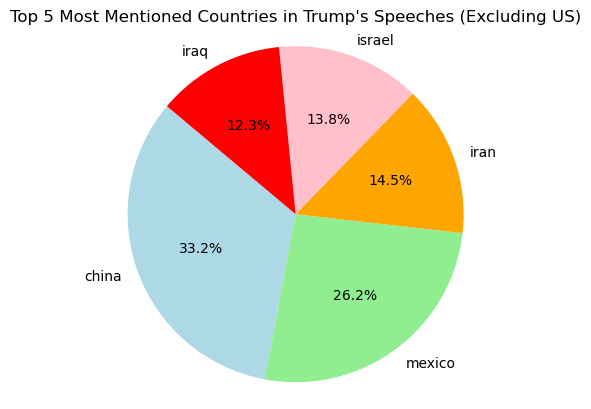

In [85]:
import requests
import string
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize stopwords and add additional punctuation
stop_words = set(stopwords.words('english'))

# Step 1: Exhaustive list of countries (excluding "America" and "United States")
countries = [
    # Africa
    "algeria", "angola", "benin", "botswana", "burkina faso", "burundi", "cape verde", "cameroon", 
    "central african republic", "chad", "comoros", "congo", "democratic republic of the congo", 
    "djibouti", "egypt", "equatorial guinea", "eritrea", "eswatini", "ethiopia", "gabon", "gambia", 
    "ghana", "guinea", "guinea-bissau", "ivory coast", "kenya", "lesotho", "liberia", "libya", 
    "madagascar", "malawi", "mali", "mauritania", "mauritius", "morocco", "mozambique", "namibia", 
    "niger", "nigeria", "rwanda", "sao tome and principe", "senegal", "seychelles", "sierra leone", 
    "somalia", "south africa", "south sudan", "sudan", "tanzania", "togo", "tunisia", "uganda", 
    "zambia", "zimbabwe",
    
    # Asia
    "afghanistan", "armenia", "azerbaijan", "bahrain", "bangladesh", "bhutan", "brunei", "cambodia", 
    "china", "cyprus", "georgia", "india", "indonesia", "iran", "iraq", "israel", "japan", "jordan", 
    "kazakhstan", "north korea", "south korea", "kuwait", "kyrgyzstan", "laos", "lebanon", "malaysia", 
    "maldives", "mongolia", "myanmar", "nepal", "oman", "pakistan", "palestine", "philippines", 
    "qatar", "russia", "saudi arabia", "singapore", "sri lanka", "syria", "taiwan", "tajikistan", 
    "thailand", "timor-leste", "turkey", "turkmenistan", "united arab emirates", "uzbekistan", 
    "vietnam", "yemen",

    # Europe
    "albania", "andorra", "armenia", "austria", "azerbaijan", "belarus", "belgium", "bosnia and herzegovina", 
    "bulgaria", "croatia", "cyprus", "czech republic", "denmark", "estonia", "finland", "france", 
    "georgia", "germany", "greece", "hungary", "iceland", "ireland", "italy", "kazakhstan", "kosovo", 
    "latvia", "liechtenstein", "lithuania", "luxembourg", "malta", "moldova", "monaco", "montenegro", 
    "netherlands", "north macedonia", "norway", "poland", "portugal", "romania", "russia", "san marino", 
    "serbia", "slovakia", "slovenia", "spain", "sweden", "switzerland", "turkey", "ukraine", "united kingdom", 
    "vatican city",

    # Americas
    "argentina", "bahamas", "barbados", "belize", "bolivia", "brazil", "canada", "chile", "colombia", 
    "costa rica", "cuba", "dominica", "dominican republic", "ecuador", "el salvador", "grenada", 
    "guatemala", "guyana", "haiti", "honduras", "jamaica", "mexico", "nicaragua", "panama", "paraguay", 
    "peru", "saint kitts and nevis", "saint lucia", "saint vincent and the grenadines", "suriname", 
    "trinidad and tobago", "uruguay", "venezuela",

    # Oceania
    "australia", "fiji", "kiribati", "marshall islands", "micronesia", "nauru", "new zealand", 
    "palau", "papua new guinea", "samoa", "solomon islands", "tonga", "tuvalu", "vanuatu"
]

# Step 2: Fetch the raw speech text from the GitHub repository
base_url = "https://raw.githubusercontent.com/ryanmcdermott/trump-speeches/master/speeches.txt"
r = requests.get(base_url)  # Send an HTTP GET request to the raw GitHub URL

# Step 3: Check if the request was successful
if r.status_code == 200:
    # Fetch the raw text from the response
    speech_text = r.text.lower()  # Convert the entire text to lowercase for case-insensitive matching
    speech_words = speech_text.split()  # Split the speech text into individual words

    # Step 4: Remove stopwords and punctuation
    filtered_words = []
    for word in speech_words:
        word = word.strip(string.punctuation)  # Remove surrounding punctuation
        if word.isalnum() and word not in stop_words:  # Keep only valid words
            filtered_words.append(word)
    
    # Step 5: Find mentions of countries
    country_mentions = []
    for word in filtered_words:
        if word in countries:  # Check if the word is a valid country name
            country_mentions.append(word)
    
    # Step 6: Count the frequency of country mentions
    country_counts = Counter(country_mentions)
    
    # Step 7: Get the top 5 most mentioned countries
    top_5_countries = country_counts.most_common(5)

    # Step 8: Print the top 5 most mentioned countries
    print("Top 5 Countries Trump Mentions (besides America or the United States):")
    for country, count in top_5_countries:
        print(f"{country.capitalize()}: {count}")
    
 # -------- Visualization Options -------- #
    print("\nChoose a type of visualization:")
    print("1. Horizontal Bar Chart")
    print("2. Pie Chart")
    print("3. Heatmap")

   # Unpack top 5 countries for visualization
    countries, counts = zip(*top_5_countries)  # Unzip the list of tuples into two lists

    # -------- Visualization: Pie Chart -------- #
    # Create a pie chart of the top 5 most mentioned countries
    plt.pie(counts, labels=countries, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'orange', 'pink', 'red'])
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Top 5 Most Mentioned Countries in Trump\'s Speeches (Excluding US)')
    plt.show()

else:
    print(f"Failed to retrieve the file. Status code: {r.status_code}")



 In class we talked about tokenizing sentences into words, or parsing texts by single words(unigrams), or two words(bigrams). But you can also tokenize by sentences. Here is some sample code:


In [56]:
import nltk
from nltk.tokenize import sent_tokenize

text = "This is the first sentence. This is the second sentence."
sentences = sent_tokenize(text)

print(sentences)

['This is the first sentence.', 'This is the second sentence.']


In class we talked about final projects and I suggested one of the interesting uses of this technology is to consider conventional thinking on some subject and use Python to more comprehensively and critically evaluate that thinking. We touched on "political thinking" as a good place to apply Python language analyses. In political speeches, certain sentences or phrases are repeated to show a candidates coaching, focus or in marketing terms, "messaging." 

Here is an analyis from https://www.vox.com/2016/8/18/12423688/donald-trump-speech-style-explained-by-linguists of the "salesman" techniques that Trump uses: "Trump’s speeches can be appealing because he uses a lot of salesmen’s tricks. Lakoff, for his part, has an explanation for why Trump’s style of speaking is so appealing to many. Many of Trump’s most famous catchphrases are actually versions of time-tested speech mechanisms that salesmen use. They’re powerful because they help shape our unconscious. Take, for example, Trump’s frequent use of "Many people are saying..." or "Believe me" — often right after saying something that is baseless or untrue. This tends to sound more trustworthy to listeners than just outright stating the baseless claim, since Trump implies that he has direct experience with what he’s talking about. At a base level, Lakoff argues, people are more inclined to believe something that seems to have been shared. Or when Trump keeps calling Clinton "crooked," or keeps referring to terrorists as "radical Muslims," he’s strengthening the association through repetition. He also calls his supporters "folks," to show he is one of them (though many politicians employ this trick). Trump doesn’t repeat phrases and adjectives because he is stalling for time, Liberman says; for the most part, he’s providing emphasis and strengthening the association. These are normal techniques, particularly in conversational speech. "Is he reading cognitive science? No. He has 50 years of experience as a salesman who doesn’t care who he is selling to," Lakoff says. On this account, Trump uses similar methods in his QVC-style pitch of steaks and vodka as when he talks about his plan to stop ISIS."He has been doing this for a very long time as a salesman — that’s what he is best at," Lakoff says."  
*This is not to say I agree or disagree with this analysis.*  This is just one example of what we touched on in class. 

10. Perform a frequency analysis that provides evidence for or against the assertion made in the Vox article.
Consider tokenizing by unigram (one word), bigram(two words), trigram(three words) or more, or whole sentences or multiple approaches that help us understand the most common Trump linguistic characteristcs. Use your evidence and words to describe what you found. This is a fairly open ask. Don't just execute code. Tell me and show me something interesting!
20pts

Tokenized Sentences (First 5):
﻿speech 1


...thank you so much.
that's so nice.
isn't he a great guy.
he doesn't get a fair press; he doesn't get it.
it's just not fair.

Key Phrase and Conversational Tic Occurrences in Trump's Speech:
'many people are saying': 0 times
'believe me': 96 times
'crooked': 14 times
'radical muslims': 0 times
'folks': 136 times
'i can tell you that': 3 times
'i know more than anyone': 0 times
'fake news': 0 times
'we're going to win': 5 times
'big league': 10 times
'make america great again': 44 times
'drain the swamp': 0 times
'fake media': 0 times
'the best': 72 times
'nobody knows': 10 times
'everyone is talking about': 0 times
'you know': 836 times
'look': 401 times
'okay': 197 times
'i mean': 298 times
'by the way': 145 times
'anyway': 19 times

Adjective Repetition:
'crooked': 14 times
'radical': 57 times
'beautiful': 71 times
'strong': 76 times
'tremendous': 117 times
'incredible': 142 times
'disgusting': 13 times
'weak': 15 times
'fantastic': 23 ti

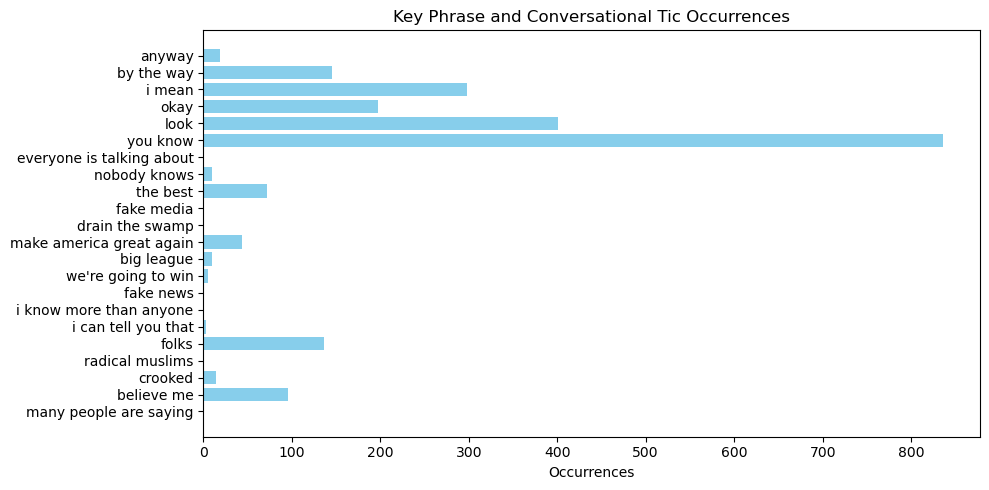

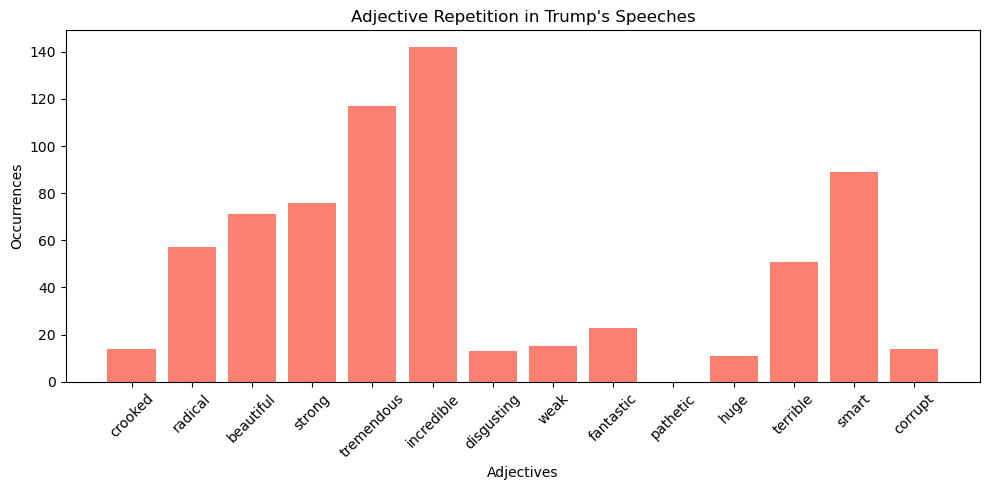

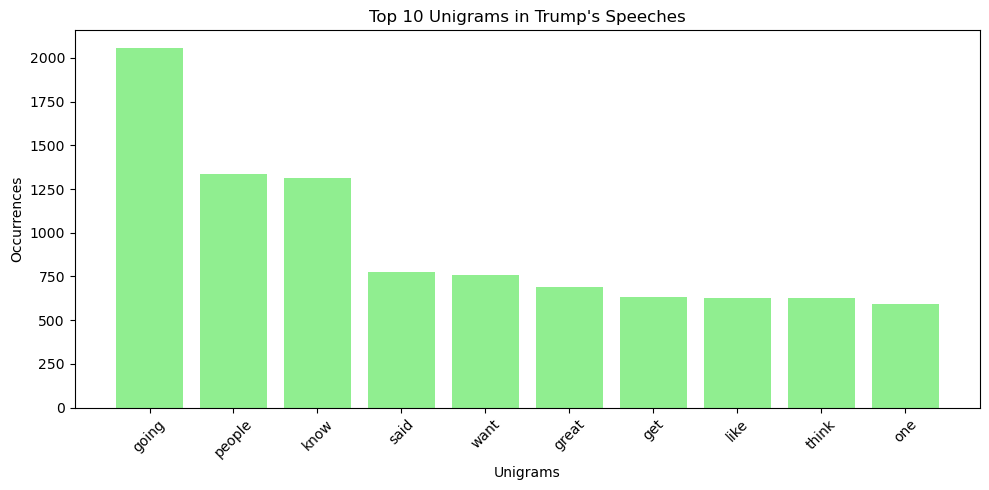



The results show that Donald Trump's speeches are conversational, persuasive, and repetitive. He often uses informal language to connect with his audience. He frequently describes himself and his actions in positive terms, while using negative words to talk about his opponents. His use of future-oriented words like 'going' suggests that he is focused on what he plans to achieve. Trump reinforces his main messages by repeating slogans and promises.
These findings support the analysis by Vox. They were right in stating that Trump uses salesman techniques and conversational language to connect emotionally with his audience. The analysis also confirms that while Trump's speeches may seem disorganized in text, they are effective at rallying support through repeated messaging and informal, relatable speech patterns.


In [98]:
import requests
import re
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.util import ngrams
import string

# Step 1: Fetch the raw speech text from the GitHub repository
base_url = "https://raw.githubusercontent.com/ryanmcdermott/trump-speeches/master/speeches.txt"
r = requests.get(base_url)

# Step 2: Check if the request was successful
if r.status_code == 200:
    # Fetch the raw text content
    speech_text = r.text

    # Convert the text to lowercase for consistent matching
    speech_text = speech_text.lower()

    # Step 3: Remove punctuation and stopwords
    stop_words = set(stopwords.words('english'))  # Load the stopwords from NLTK
    punctuation = set(string.punctuation)  # Set of punctuation characters

    # Tokenize the text into words (unigrams)
    tokens = word_tokenize(speech_text)
    
    # Filter out stopwords and punctuation from the tokens
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in punctuation and word.isalnum()]

    # Tokenize the text into sentences
    sentences = sent_tokenize(speech_text)
    print("Tokenized Sentences (First 5):")
    for sentence in sentences[:5]:  # Print the first 5 sentences
        print(sentence)

    # Step 4: Define the expanded list of key phrases, conversational tics, and adjectives to search for
    key_phrases = [
        "many people are saying", 
        "believe me", 
        "crooked", 
        "radical muslims", 
        "folks", 
        "i can tell you that", 
        "i know more than anyone", 
        "fake news", 
        "we're going to win", 
        "big league",
        "make america great again",
        "drain the swamp",
        "fake media",
        "the best",
        "nobody knows",
        "everyone is talking about"
    ]

    conversational_tics = ["you know", "look", "okay", "i mean", "by the way", "anyway"]

    # Expanded list of adjectives
    adjectives = [
        "crooked", "radical", "beautiful", "strong", "tremendous", 
        "incredible", "disgusting", "weak", "fantastic", "pathetic", 
        "huge", "terrible", "smart", "corrupt"
    ]

    # Function to count occurrences of each key phrase and tic
    def count_key_phrases(text, phrases):
        '''Function to count occurrences of each key phrase and tic'''
        phrase_counts = {}
        for phrase in phrases:
            # Use regex to find all occurrences of the phrase
            count = len(re.findall(rf'\b{re.escape(phrase)}\b', text))
            phrase_counts[phrase] = count
        return phrase_counts

    # Step 5: Count the occurrences of key phrases and conversational tics
    phrase_counts = count_key_phrases(speech_text, key_phrases + conversational_tics)

    # Step 6: Print the results for key phrases and conversational tics
    print("\nKey Phrase and Conversational Tic Occurrences in Trump's Speech:")
    for phrase, count in phrase_counts.items():
        print(f"'{phrase}': {count} times")

    # Step 7: Find and count repeated adjectives
    adj_counts = Counter()
    for adj in adjectives:
        adj_counts[adj] = len(re.findall(rf'\b{re.escape(adj)}\b', speech_text))

    # Step 8: Print adjective repetition results
    print("\nAdjective Repetition:")
    for adj, count in adj_counts.items():
        print(f"'{adj}': {count} times")

    # Step 9: N-gram analysis with filtered tokens

    # Unigrams (individual words)
    unigram_counts = Counter(filtered_tokens)
    
    # Bigrams (two-word sequences)
    bigrams = list(ngrams(filtered_tokens, 2))
    bigram_counts = Counter(bigrams)
    
    # Trigrams (three-word sequences)
    trigrams = list(ngrams(filtered_tokens, 3))
    trigram_counts = Counter(trigrams)

    # Step 10: Print top 10 most common unigrams, bigrams, and trigrams
    print("\nTop 10 Unigrams (After Stopword Removal):")
    for word, count in unigram_counts.most_common(10):
        print(f"{word}: {count}")

    print("\nTop 10 Bigrams (After Stopword Removal):")
    for bigram, count in bigram_counts.most_common(10):
        print(f"{' '.join(bigram)}: {count}")

    print("\nTop 10 Trigrams (After Stopword Removal):")
    for trigram, count in trigram_counts.most_common(10):
        print(f"{' '.join(trigram)}: {count}")

 #------- Visualization -------- #
    # Visualization for Key Phrases and Conversational Tics
    plt.figure(figsize=(10, 5))
    plt.barh(list(phrase_counts.keys()), list(phrase_counts.values()), color='skyblue')
    plt.xlabel('Occurrences')
    plt.title('Key Phrase and Conversational Tic Occurrences')
    plt.tight_layout()
    plt.show()

    # Visualization for Adjective Repetition
    plt.figure(figsize=(10, 5))
    plt.bar(list(adj_counts.keys()), list(adj_counts.values()), color='salmon')
    plt.xlabel('Adjectives')
    plt.ylabel('Occurrences')
    plt.title('Adjective Repetition in Trump\'s Speeches')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Visualization for N-Gram Frequencies (Unigrams)
    unigram_data = unigram_counts.most_common(10)
    words, counts = zip(*unigram_data)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='lightgreen')
    plt.xlabel('Unigrams')
    plt.ylabel('Occurrences')
    plt.title('Top 10 Unigrams in Trump\'s Speeches')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

else:
    print(f"Failed to retrieve the file. Status code: {r.status_code}")

print("\n===============================================================================================================\n")

print("The results show that Donald Trump's speeches are conversational, persuasive, and repetitive. He often uses informal language to connect with his audience. He frequently describes himself and his actions in positive terms, while using negative words to talk about his opponents. His use of future-oriented words like 'going' suggests that he is focused on what he plans to achieve. Trump reinforces his main messages by repeating slogans and promises.\n"
    "These findings support the analysis by Vox. They were right in stating that Trump uses salesman techniques and conversational language to connect emotionally with his audience. The analysis also confirms that while Trump's speeches may seem disorganized in text, they are effective at rallying support through repeated messaging and informal, relatable speech patterns."
)


## 6. Mired in Mango Madness ##
20pts

Congratulations! In your last semester at Yale, you got a job at the World Bank ! 

Your first assignment is to address the dearth of good data in Mali on Mango quality and production. Your boss put you on a plane to Mali during the harvest season. You are excited, not only because your boss is annoying and wears too much cologne, but international travel is part of the excitement of an international job. You are excited to see the Great Mosque of Djenne, to watch the sunset from the Bandiagara Cliffs, and to dance the night away to  at Le Byblos. Oh yeah, there is the work too. After a particular "rough" night you meet with your colleagues at the office.  You thought you'd be able to just get by making eye contact and nodding while they did most of the work. After all, you are new to the role. No such luck. Your colleagues are thrilled that you can solve their problems by creating an automated call center. Their exact words are, "The Harvard grad ended up quitting, I'm glad we have someone from Yale here to make things right."

You are given an office and a computer. You may have slightly overstated your Python coding skills to get the job, but too late now. They ask if you mind if they watch you code. You tell them that you prefer to work alone, although ask them to lunch later to soften the push back. After the initial panic and hangover subsides you think back to your days in intermediate python at Yale, the encouraging words of your caring but demanding prof,  and then a light flashes in your mind and you think, "I got this." 

You've been tasked with the goal of setting up an automated call center to get data on current market prices, production and quality. There are growers who are both collectives who report these factors, and also smaller growers! Unfortunately, some of these are incentivized to underreport production and prices under the assumption that they will receive more foreign aid. Not all of them though! It's estimated that 10-20% of the self-reporting is innacurate. Callers call the center. Words are processed from speech to text. Text is processed, converted back to speech and then communicated to the caller. 

There are a few challenges you face: 
1. The speech to text algo was trained on French, but most of the farmers who call in speak Bambara. You must translate from Bambara to French, and then French to English, because your boss doesn't speak French and wants things in English and is completely unreasonable.
2. Sometimes the call just ends, sometimes words are sporadic, sometimes the algo. confuses the word "child" and the word "mango"
3. The call in number was once the number for the infant health hotline. People still use the number to try to get immediate emergency care for their infant. Their calls must be redirected or children could die and it would be your fault, not to mention an international incident.
4. The call number is often called by fans and musicians who are given the number by directory assistance because there is a music production company called Mango Mali, a fledgling world music group that markets music from Mali to France.
5. You must try to identify who is lying about their crop yield quality and prices.


**YOUR MISSION**

Write code that accepts the number as an input and then collects user input(in Bambara), translates it to French, and then outputs the data to a csv file in English. Please make sure you write code that addresses the challenges above (1-5). 
Create use cases to demonstrate that your code works and that you have addressed the basic use case, and that you have addressed challenges 1-5.

In [97]:
!pip install googletrans==4.0.0-rc1

In [28]:
!pip install deep-translator

   ---------------------------------------- 0.0/42.3 kB ? eta -:--:--
   ---------------------------------------- 42.3/42.3 kB 1.0 MB/s eta 0:00:00


In [63]:
#importing essential libraries
import csv
from deep_translator import GoogleTranslator
import random

# Baseline crop yield (tons) and price (USD per ton) for comparison
BASELINE_CROP_YIELD = {'mango': {'min': 5, 'max': 15}, 'price_per_ton': {'min': 500, 'max': 2000}}  # Example baseline

# List of emergency-related words/phrases
EMERGENCY_KEYWORDS = ['child', 'emergency', 'health', 'infant', 'den', 'sick', 'doctor', 'hospital', 'help']

# List of music-related words/phrases
MUSIC_KEYWORDS = ['music', 'song', 'album', 'artist', 'Mango Mali', 'concert', 'band', 'record', 'world music', 'dɔnkiliw', 'dɔnkili']

def translate_bambara_to_french(bambara_text):
    """
    Translate the provided Bambara text to French using deep-translator's GoogleTranslator.
    Args:
        bambara_text (str): The text in Bambara to be translated.
    Returns:
        str: The translated text in French, or an error message if translation fails.
    """
    try:
        translation = GoogleTranslator(source='auto', target='fr').translate(bambara_text)
        return translation
    except Exception as e:
        print(f"Error occurred during translation from Bambara to French: {e}")
        return "Translation Failed"

def translate_french_to_english(french_text):
   """
    Translate the provided French text to English using deep-translator's GoogleTranslator.
    Args:
        french_text (str): The text in French to be translated. 
    Returns:
        str: The translated text in English, or an error message if translation fails.
    """
    try:
        translation = GoogleTranslator(source='fr', target='en').translate(french_text)
        return translation
    except Exception as e:
        print(f"Error occurred during translation from French to English: {e}")
        return "Translation Failed"

def handle_word_confusion(input_text):
    """
    Handle cases where the words for 'child' (den) and 'mango' (nana) are confused in the input.
    The function asks for clarification and replaces the incorrect word.
    Args:
        input_text (str): The input text that may contain the words 'den' and 'nana'.
    Returns:
        str: The corrected input text after clarification.
    """
    if "den" in input_text and "nana" in input_text:
        # If both are present, ask for clarification
        print("The input contains both 'den' (child) and 'nana' (mango). Please clarify.")
        clarification = input("Did you mean 'den' (child) or 'nana' (mango)? Enter 'child' or 'mango': ").strip().lower()
        if clarification == "child":
            return input_text.replace("nana", "")
        elif clarification == "mango":
            return input_text.replace("den", "")
    return input_text

def is_input_complete(input_text):
    """
    Check if the input text is complete and not too short, which might indicate a cut-off call.
    Args:
        input_text (str): The input text to check for completeness.
    Returns:
        bool: True if the input is complete, False otherwise.
    """
    if not input_text or len(input_text.split()) < 2:
        return False
    return True

def detect_emergency(input_text):
    """
    Detect if the input text contains any emergency-related keywords.
    Args:
        input_text (str): The input text to scan for emergency-related words.
    Returns:
        bool: True if any emergency keywords are detected, False otherwise.
    """
    for keyword in EMERGENCY_KEYWORDS:
        if keyword in input_text.lower():
            return True
    return False

def detect_music_related_call(input_text):
    """
    Detect if the input text is related to music or the Mango Mali music production company.
    Args:
        input_text (str): The input text to scan for music-related words.
    Returns:
        bool: True if any music-related keywords are detected, False otherwise.
    """
    for keyword in MUSIC_KEYWORDS:
        if keyword.lower() in input_text.lower():
            return True
    return False

def detect_fraud(crop_yield, crop_price):
    """
    Compare the reported yield and price to baseline data to detect possible fraudulent activity.
    Args:
        crop_yield (float): The reported mango yield in tons.
        crop_price (float): The reported price per ton in USD.
    Returns:
        bool: True if the reported data is suspicious, False otherwise.
    """
    baseline_yield_min = BASELINE_CROP_YIELD['mango']['min']
    baseline_yield_max = BASELINE_CROP_YIELD['mango']['max']
    baseline_price_min = BASELINE_CROP_YIELD['price_per_ton']['min']
    baseline_price_max = BASELINE_CROP_YIELD['price_per_ton']['max']
    
    # Detect if reported yield or price is outside the expected range
    if not (baseline_yield_min <= crop_yield <= baseline_yield_max):
        print(f"Suspicious yield reported! Expected range: {baseline_yield_min} - {baseline_yield_max} tons. Reported: {crop_yield} tons.")
        return True
    if not (baseline_price_min <= crop_price <= baseline_price_max):
        print(f"Suspicious price reported! Expected range: {baseline_price_min} - {baseline_price_max} USD per ton. Reported: {crop_price} USD per ton.")
        return True
    
    return False

def save_to_csv(phone_number, english_text, fraud_flag):
    """
    Save the phone number, English translation, and fraud detection status to a CSV file.
    Args:
        phone_number (str): The phone number of the caller.
        english_text (str): The translated English text of the user's input.
        fraud_flag (bool): Whether the data is flagged as fraud (True) or legit (False).
    """
    with open('translated_data.csv', mode='a', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow([phone_number, english_text, "Fraud" if fraud_flag else "Legit"])
    print("Data saved to CSV.")

def collect_user_input():
    """
    Main function to collect input from the user, handle translations, and detect fraud or other issues.
    Repeats the process until the user chooses to exit.
    """
    while True:
        # Step 1: Accept phone number as input, keep asking until the correct format is provided
        while True:
            phone_number = input("Enter caller's phone number (must be 2035555555): ")
            if phone_number == "2035555555":
                break
            else:
                print("Invalid phone number. Please try again with the correct number: 2035555555")

        # Step 2: Collect spoken input in Bambara
        while True:
            bambara_input = input("Enter the spoken input in Bambara: ")

            # Handle the case where input is incomplete (call ends or sporadic words)
            if not is_input_complete(bambara_input):
                print("Input seems incomplete or call may have ended abruptly. Please try again.")
                continue

            # Step 3: Detect if it's an emergency call
            if detect_emergency(bambara_input):
                print("Emergency detected! Redirecting to infant health emergency services...")
                break  # Skip further processing and ask if the user wants to call again

            # Step 4: Detect if it's a music-related call before translation
            if detect_music_related_call(bambara_input):
                print("You have reached the wrong company. This is Mango quality production in Mali, not the Mango Mali music production company.")
                print("Please contact the Mango Mali music production company for your music-related queries.")
                break  # End the call after informing the user they called the wrong company

            # Step 5: Handle word confusion (child vs. mango)
            corrected_input = handle_word_confusion(bambara_input)
            break

        # If it's an emergency or misrouted music call, ask if they want to call again without asking for yield/price
        if detect_emergency(bambara_input) or detect_music_related_call(bambara_input):
            call_again = input("\nDo you want to make another call? (yes/no): ").strip().lower()
            if call_again != "yes":
                print("Thank you for using the system. Goodbye!")
                break
            continue  # Go back to the start of the loop to handle another call

        # Step 6: Get additional yield and price information from the user
        try:
            crop_yield = float(input("Enter the reported mango yield in tons: "))
            crop_price = float(input("Enter the reported price per ton in USD: "))
        except ValueError:
            print("Invalid input for yield or price. Please try again.")
            continue

        # Step 7: Translate Bambara to French
        french_translation = translate_bambara_to_french(corrected_input)

        # Step 8: Translate French to English
        english_translation = translate_french_to_english(french_translation)

        # Step 9: Detect fraud based on reported yield and price
        fraud_flag = detect_fraud(crop_yield, crop_price)

        # Step 10: Display the translations and fraud detection status
        print(f"\nPhone Number: {phone_number}")
        print(f"Bambara Input: {corrected_input}")
        print(f"French Translation: {french_translation}")
        print(f"English Translation: {english_translation}")
        print(f"Fraud Detection: {'Suspicious activity detected!' if fraud_flag else 'Data looks legit.'}")

        # Step 11: Save the phone number, English translation, and fraud status to a CSV file
        save_to_csv(phone_number, english_translation, fraud_flag)

        # Step 12: Ask the user if they want to make another call
        call_again = input("\nDo you want to make another call? (yes/no): ").strip().lower()
        if call_again != "yes":
            print("Thank you for using the system. Goodbye!")
            break

if __name__ == "__main__":
    collect_user_input()


Enter caller's phone number (must be 2035555555):  203555555


Invalid phone number. Please try again with the correct number: 2035555555


Enter caller's phone number (must be 2035555555):  2035555555
Enter the spoken input in Bambara:  I ka kɛnɛ wa den


Emergency detected! Redirecting to infant health emergency services...



Do you want to make another call? (yes/no):  yes
Enter caller's phone number (must be 2035555555):  I ka kɛnɛ wa fɔli


Invalid phone number. Please try again with the correct number: 2035555555


Enter caller's phone number (must be 2035555555):  2035555555
Enter the spoken input in Bambara:  I ka kɛnɛ wa fɔli
Enter the reported mango yield in tons:  23
Enter the reported price per ton in USD:  34


Suspicious yield reported! Expected range: 5 - 15 tons. Reported: 23.0 tons.

Phone Number: 2035555555
Bambara Input: I ka kɛnɛ wa fɔli
French Translation: Je vais bien, je dis
English Translation: I'm fine, I say.
Fraud Detection: Suspicious activity detected!
Data saved to CSV.



Do you want to make another call? (yes/no):  yes
Enter caller's phone number (must be 2035555555):  2035555555
Enter the spoken input in Bambara:  N b’a fɛ ka dɔnkili ni dɔnkili da


You have reached the wrong company. This is Mango quality production in Mali, not the Mango Mali music production company.
Please contact the Mango Mali music production company for your music-related queries.



Do you want to make another call? (yes/no):  yes
Enter caller's phone number (must be 2035555555):  2035555555
Enter the spoken input in Bambara:  bɛ ... fɛ
Enter the reported mango yield in tons:  23
Enter the reported price per ton in USD:  0.1


Suspicious yield reported! Expected range: 5 - 15 tons. Reported: 23.0 tons.

Phone Number: 2035555555
Bambara Input: bɛ ... fɛ
French Translation: propre
English Translation: own
Fraud Detection: Suspicious activity detected!
Data saved to CSV.



Do you want to make another call? (yes/no):  yes
Enter caller's phone number (must be 2035555555):  2035555555
Enter the spoken input in Bambara:  Denmisɛnnin bɛ mangoro tunun


Emergency detected! Redirecting to infant health emergency services...



Do you want to make another call? (yes/no):  yes
Enter caller's phone number (must be 2035555555):  2035555555
Enter the spoken input in Bambara:  123


Input seems incomplete or call may have ended abruptly. Please try again.


Enter the spoken input in Bambara:  Mango Mali concert


You have reached the wrong company. This is Mango quality production in Mali, not the Mango Mali music production company.
Please contact the Mango Mali music production company for your music-related queries.



Do you want to make another call? (yes/no):  no


Thank you for using the system. Goodbye!
